In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os import path
root = '/project/wyin/jlee/ml-project'
data_loc = 'data'
print(os.getcwd())

/project/wyin/jlee/ml-project/data-collection/full-dataset


In [44]:
def plot_dos(ax, t1, t2, J):
    file_path = f'param_{t1:.2f}_{t2:.2f}_{J:.3f}'
    dos = np.loadtxt(os.path.join('data', file_path, 'dos.dat'))
    ax.set_ylim([0, 1.5])
    ax.set_ylabel('dos')
#     ax.set_xlabel('w')
    ax.plot(dos[:,0], dos[:,1])
    
    ax.set_title(f't1 = {t1:.2f}, t2 = {t2:.2f}, J = {J:.2f}')
    

def plot_arpes(ax, t1, t2, J, k_path, x1, y1, x2, y2):
    file_path = f'param_{t1:.2f}_{t2:.2f}_{J:.3f}'
    arpes = np.loadtxt(path.join('data', file_path, f'arpes{k_path}.dat'))
    k_num = arpes.shape[1] - 1
    w = arpes[:,0]
    k = np.arange(0, k_num)

    K, W = np.meshgrid(k,w)
    intensity = arpes[:,1:]
    c = ax.pcolormesh(K, W, intensity, cmap=plt.cm.get_cmap('Greys_r'))
    plt.colorbar(c, ax=ax)
    
    ax.set_title(k_path)
    ax.set_xlabel('K')
    ax.set_ylabel('W')
    
    #Create xticks
    tick_pos = np.linspace(0, k_num - 1, 4)

    kx = x1 + (x2 - x1) * tick_pos / (k_num - 1)
    ky = y1 + (y2 - y1) * tick_pos / (k_num - 1)
    
    tick_labels = [f'({x:.2f}, {y:.2f})' for (x, y) in zip(kx, ky)]
    
    ax.set_xticks(tick_pos)
    ax.set_xticklabels(tick_labels)
    
    return arpes

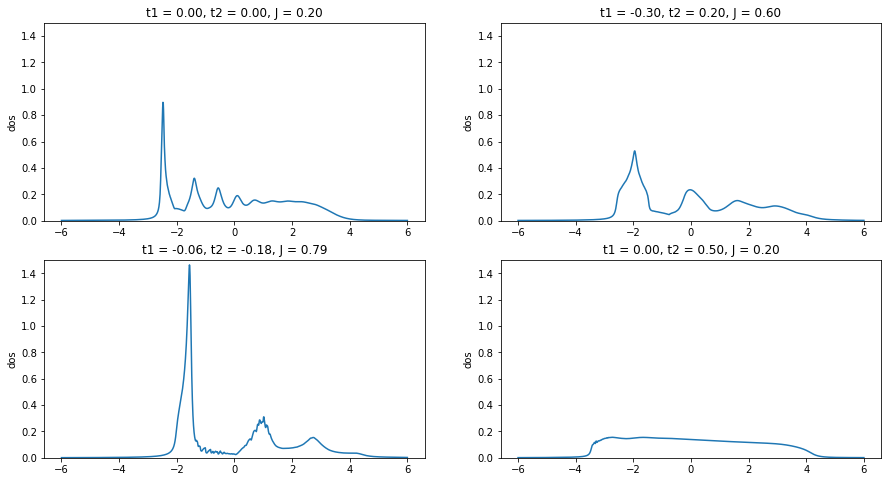

In [29]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))

plot_dos(ax[0, 0], 0.0, 0.0, 0.2)
plot_dos(ax[0, 1], -0.3, 0.2, 0.6)
plot_dos(ax[1, 0], -0.06, -0.18, 0.792)
plot_dos(ax[1, 1], 0.0, 0.50, 0.20)

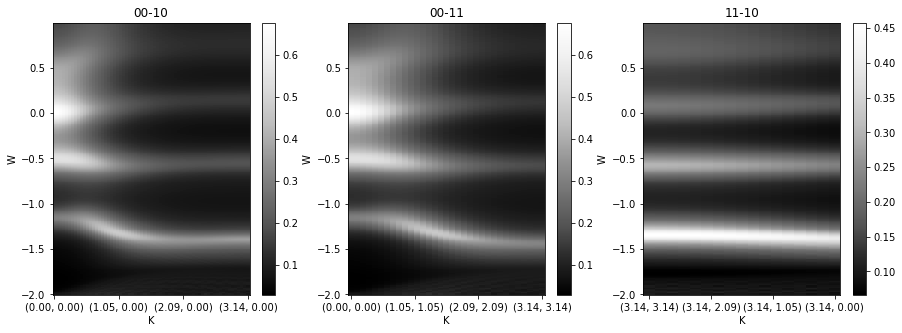

In [60]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

arpes1 = plot_arpes(ax[0], 0.0, 0.0, 0.2, '00-10', 0, 0, np.pi, 0)
arpes2 = plot_arpes(ax[1], 0.0, 0.0, 0.2, '00-11', 0, 0, np.pi, np.pi)
arpes3 = plot_arpes(ax[2], 0.0, 0.0, 0.2, '11-10', np.pi, np.pi, np.pi, 0)

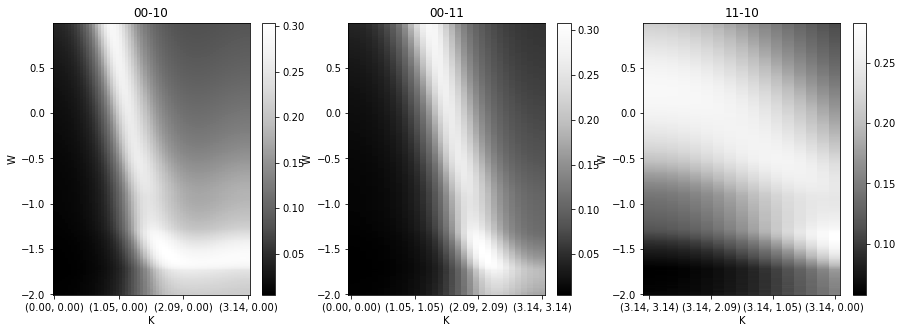

In [64]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

arpes1 = plot_arpes(ax[0], 0.4, 0.32, 0.2, '00-10', 0, 0, np.pi, 0)
arpes2 = plot_arpes(ax[1], 0.4, 0.32, 0.2, '00-11', 0, 0, np.pi, np.pi)
arpes3 = plot_arpes(ax[2], 0.4, 0.32, 0.2, '11-10', np.pi, np.pi, np.pi, 0)

In [61]:
print(arpes1)

[[-2.       0.07384  0.07292 ...  0.09056  0.08977  0.07622]
 [-1.99     0.0742   0.07329 ...  0.09043  0.08962  0.07608]
 [-1.98     0.06131  0.06238 ...  0.08241  0.07713  0.08401]
 ...
 [ 0.97     0.17453  0.17514 ...  0.10539  0.10541  0.10541]
 [ 0.98     0.1726   0.17322 ...  0.10487  0.10489  0.10489]
 [ 0.99     0.17067  0.1713  ...  0.10447  0.10448  0.10449]]


In [62]:
print(arpes2)

[[-2.       0.07384  0.07258 ...  0.07356  0.07581  0.08969]
 [-1.99     0.0742   0.07295 ...  0.07352  0.07577  0.08966]
 [-1.98     0.06131  0.06272 ...  0.07692  0.07862  0.08226]
 ...
 [ 0.97     0.17453  0.17575 ...  0.1003   0.09962  0.09939]
 [ 0.98     0.1726   0.17384 ...  0.10013  0.09944  0.09921]
 [ 0.99     0.17067  0.17191 ...  0.10006  0.09937  0.09913]]


In [63]:
print(arpes3)

[[-2.       0.10541  0.0962  ...  0.08601  0.09232  0.08762]
 [-1.99     0.1056   0.09636 ...  0.08605  0.09232  0.08759]
 [-1.98     0.10265  0.10159 ...  0.10125  0.09434  0.0858 ]
 ...
 [ 0.97     0.17038  0.17017 ...  0.13725  0.13378  0.13039]
 [ 0.98     0.17034  0.17013 ...  0.13719  0.1337   0.1303 ]
 [ 0.99     0.17042  0.1702  ...  0.13722  0.13373  0.13031]]
